# Logistic Regression for Identifying Depression Among Students
This notebook walks through the process of predicting student depression using logistic regression, including data exploration, preprocessing, model training, and evaluation.

## Task 1 – Explore the Data
Let's start by examining the data, checking for missing values, and visualizing relationships.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Darya\\Desktop\\Новая папка (1)\\Github\\World of programming\\Machine learning 2025\\ml\\Seminar 9\\Student Depression Dataset.csv")
if 'id' in df.columns:
    df = df.drop(columns=['id'])
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [5]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


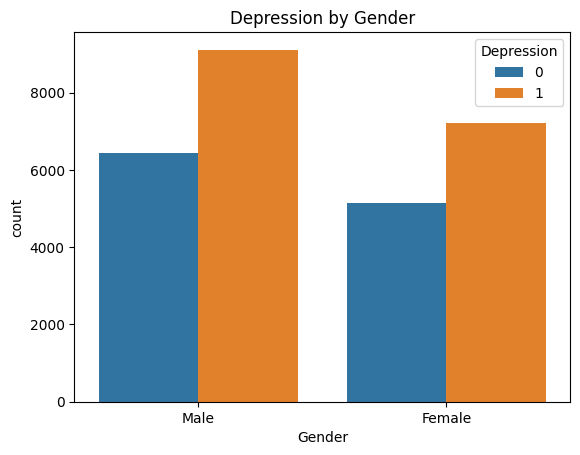

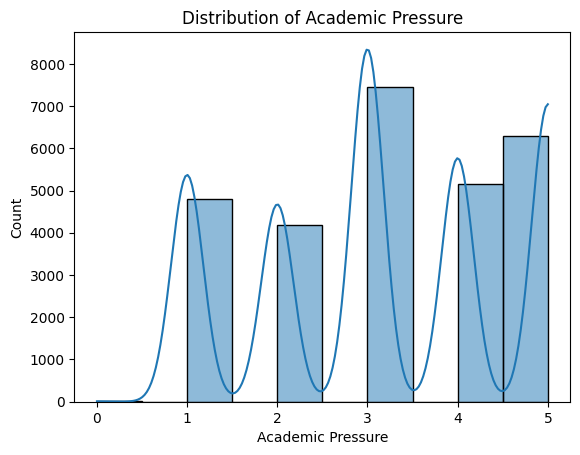

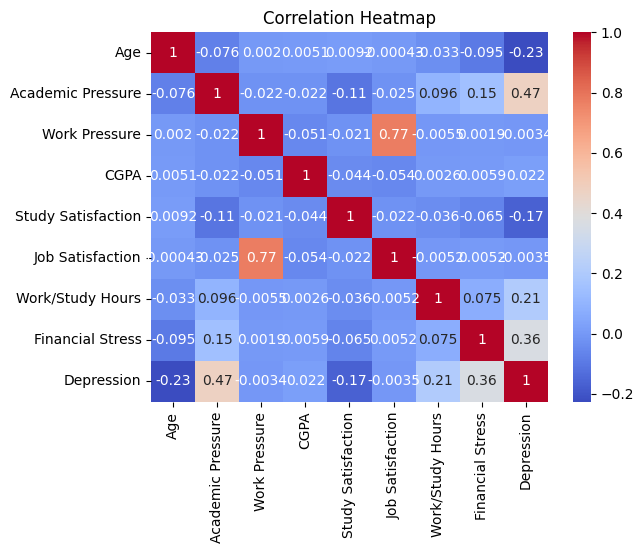

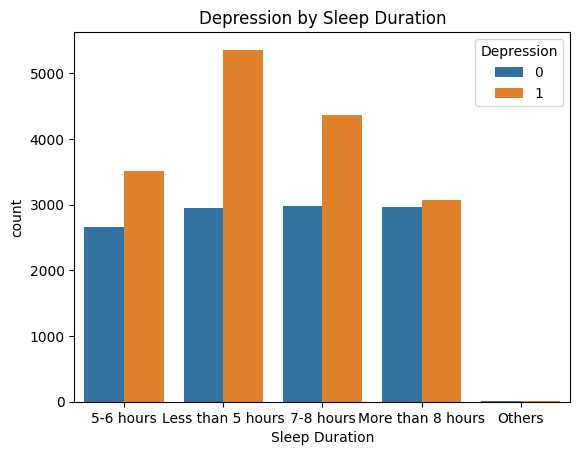

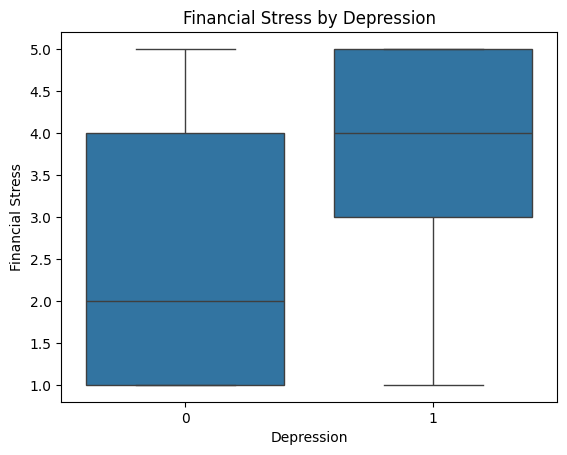

In [6]:
# Visualizing depression by gender
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Depression by Gender')
plt.show()

# Visualizing academic pressure
sns.histplot(df['Academic Pressure'], bins=10, kde=True)
plt.title('Distribution of Academic Pressure')
plt.show()

# Correlation heatmap for numerical features
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Depression vs sleep duration
sns.countplot(x='Sleep Duration', hue='Depression', data=df)
plt.title('Depression by Sleep Duration')
plt.show()

# Depression vs financial stress
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title('Financial Stress by Depression')
plt.show()

## Task 2 – Data Preprocessing
We need to handle missing values, encode categorical features, and scale numeric ones.

In [7]:
# Fill missing numeric values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
            'Work/Study Hours', 'Financial Stress']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### Preprocessing Choices Explained
- Filled missing values to avoid losing data.
- Used label encoding for categorical variables, as logistic regression requires numeric values.
- Standardized numeric features to improve model performance and convergence.

## Task 3 – Train the Model
Let's split the data, train logistic regression, and make predictions.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('Depression', axis=1)
y = df['Depression']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train
clf = LogisticRegression(max_iter=200, solver='lbfgs')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

## Task 4 – Evaluate the Model
We will use accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.

Accuracy: 0.84
Precision: 0.86
Recall: 0.88
F1-score: 0.87
Confusion Matrix:
[[1828  485]
 [ 393 2875]]


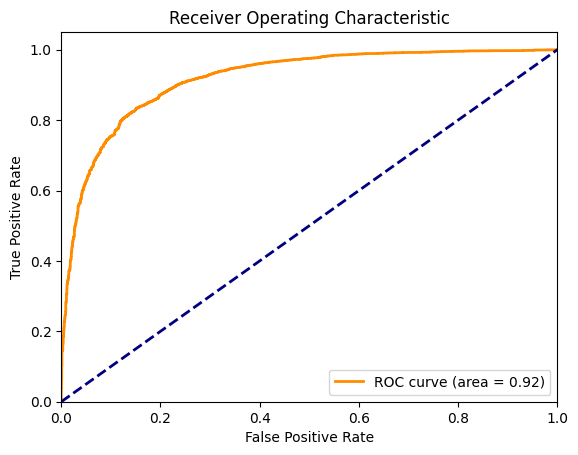

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Analyzing Predicted Probabilities
- We can set a different threshold to classify depression based on the predicted probabilities. For example, students with probability > 0.7 could be flagged for further support.
- Visualizing the distribution helps identify borderline cases.

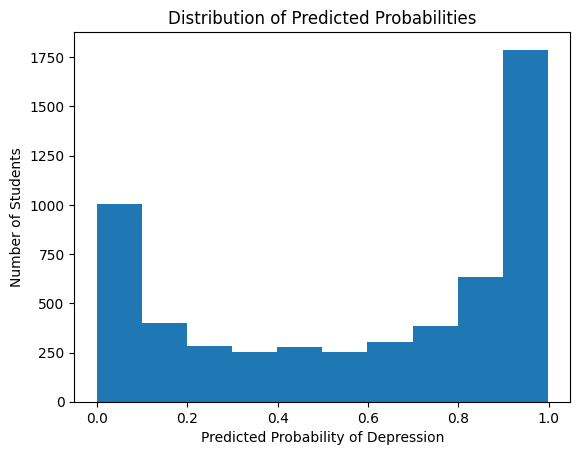

In [10]:
plt.hist(y_proba, bins=10)
plt.xlabel('Predicted Probability of Depression')
plt.ylabel('Number of Students')
plt.title('Distribution of Predicted Probabilities')
plt.show()

## Conclusion
- Explored data and visualized important relationships.
- Preprocessed data and encoded categorical features.
- Trained logistic regression and evaluated using multiple metrics.
- Analyzed predicted probabilities for additional insight.

You can further improve the model by:
- Adding feature engineering
- Trying other models
- Hyperparameter tuning
- Collecting more data